In [4]:
import csv
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [5]:
names = []

with open('vornamen.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if row[1] != "unspezifisch":
            names.append(row)

In [6]:
def count_for_rule(string, rule, is_in):
    count = 0
    for char in string:
        if char in rule and is_in:
            count = count + 1
        elif not is_in and char not in rule:
            count = count + 1
    return count

In [7]:
def count_vocal(s):
    return count_for_rule(
        s,
        ['a','e','i','o','u'],
        True
    )

In [8]:
def count_consonant(s):
    return count_for_rule(
        s,
        ['a','e','i','o','u'],
        False
    )

print(count_consonant('a'))

0


In [9]:
def count_soft_consonant(s):
    return count_for_rule(
        s,
        ['b','d','g'],
        True
    )

In [10]:
def count_hard_consonant(s):
    return count_for_rule(
        s,
        ['p','k','t'],
        True
    )

In [11]:
def last_letter(string, letter):
    if string[-1] == letter:
        return 1
    return 0

In [12]:
def last_letter_a(s):
    return last_letter(s, 'a')

In [13]:
def last_letter_n(s):
    return last_letter(s, 'n')

In [14]:
def is_female(s):
    if s == 'weiblich':
        return 'r'
    return 'b'

In [15]:
def convert_mw_to_01(mw):
    if mw == 'weiblich':
        return 1
    return 0

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [17]:
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

[[1, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 1, 0, 0], [1, 0, 0, 2, 1, 0, 0], [0, 1, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1], [0, 1, 3, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 1], [0, 1, 2, 0, 1, 0, 1], [1, 0, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [1, 0, 2, 0, 1, 0, 1], [0, 1, 3, 0, 1, 0, 1], [0, 1, 2, 1, 1, 0, 0], [0, 1, 2, 2, 1, 0, 0], [1, 0, 2, 0, 1, 0, 1], [0, 1, 2, 0, 1, 0, 0], [0, 1, 2, 1, 1, 0, 0], [1, 0, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [1, 0, 3, 1, 1, 0, 0], [0, 1, 3, 1, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 0], [1, 0, 2, 0, 1, 0, 1], [1, 0, 3, 0, 1, 0, 0], [1, 0, 2, 0, 1, 0, 0], [0, 1, 1, 0, 1, 0, 0], [0, 1, 2, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0], [0, 1, 2, 

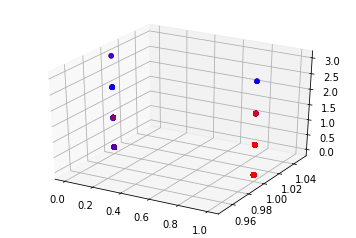

In [18]:
X = []
Y = []
Z = []
C = []
training_data = []

for i in range(1000):
    X.append(count_vocal(names[i][0][-1]))
    Y.append(count_vocal(names[i][0][0]))
    Z.append(count_soft_consonant(names[i][0]))
    C.append(is_female(names[i][1]))

for name in names:
    n = name[0]
    training_data.append([
        count_vocal(n[-1]),
        count_consonant(n[-1]),
        count_soft_consonant(n),
        count_hard_consonant(n),
        count_vocal(n[0]),
        count_consonant(n[0]),
        convert_mw_to_01(name[1])
    ])
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=C);

print(training_data)

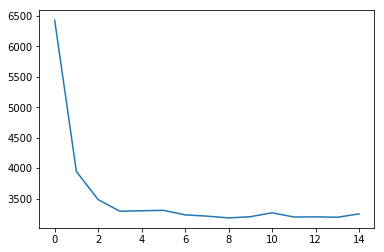

In [20]:
#train model

#random weight initilization
#weights = []

#for i in range(len(features)):
#    weights.append(np.random.uniform(low=i/10, high=i/10+0.1, size=1)[0])
    
w1 = np.random.uniform(low=0.1, high=0.2, size=1)[0]
w2 = np.random.uniform(low=0.2, high=0.3, size=1)[0]
w3 = np.random.uniform(low=0.3, high=0.4, size=1)[0]
w4 = np.random.uniform(low=0.4, high=0.5, size=1)[0]
w5 = np.random.uniform(low=0.5, high=0.6, size=1)[0]
w6 = np.random.uniform(low=0.6, high=0.7, size=1)[0]
bias_weight = np.random.uniform(low=0.7, high=0.8, size=1)[0]

iterations = 60000
learning_rate = 0.1
costs = []

for i in range(iterations):
    point = training_data[np.random.randint(len(training_data))]
    
#    Z = calculate_weight_by_feature(features, weights)
    z = \
        w1 * point[0] \
        + w2 * point[1] \
        + w3 * point[2] \
        + w4 * point[3] \
        + w5 * point[4] \
        + w6 * point[5] \
        + bias_weight
    
    prediction = sigmoid(z)
    target = point[6]
    
    cost = np.square(prediction - target)
    
    if i % 100 == 0:
        c = 0
        for j in range(len(training_data)):
            cost_point = training_data[j]            
            cost_z = \
                w1 * cost_point[0] \
                + w2 * cost_point[1] \
                + w3 * cost_point[2] \
                + w4 * cost_point[3] \
                + w5 * cost_point[4] \
                + w6 * cost_point[5] \
                + bias_weight

            
            c += np.square(sigmoid(cost_z) - cost_point[6])
        costs.append(c)
    
    derivative_cost_prediction = learning_rate * 2 * (prediction - target) * sigmoid_p(z)
    
    w1 = w1 - derivative_cost_prediction * point[0]
    w2 = w2 - derivative_cost_prediction * point[1]
    w3 = w3 - derivative_cost_prediction * point[2]
    w4 = w4 - derivative_cost_prediction * point[3]
    w5 = w5 - derivative_cost_prediction * point[4]
    w6 = w6 - derivative_cost_prediction * point[5]
    bias_weight = bias_weight - derivative_cost_prediction * 1
    
fig = plt.plot(costs)

In [21]:
mystery_name = 'Adkfjsdfjgsdjfgkjsdfhkugnna'

z = \
    w1 * count_vocal(mystery_name) \
    + w2 * count_consonant(mystery_name) \
    + w3 * count_soft_consonant(mystery_name) \
    + w4 * count_hard_consonant(mystery_name) \
    + w5 * last_letter_a(mystery_name) \
    + w6 * last_letter_n(mystery_name) \
    + bias_weight


prediction = sigmoid(z)
print(prediction)

4.090724711752193e-15
